# Electromiografía: Graficar y explorar datos.

## Flores Oliva Alejandro Elliot
###### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:
[Obtención y visualización de señales electromiográficas](#Obtenciónyvisualización)

######  Miembro Superior

[Músculo bíceps](#Músculobíceps)

[Músculo tríceps](#Músculotríceps)

[Músculos del antebrazo](#Músculosdelantebrazo)

###### Cabeza

[Músculos de la mandíbula](#Músculosdelamandíbula)

######  Abdomen

[Músculos abdominales](#Músculosabdominales)

######  Miembro Inferior

[Músculos cuádriceps](#Músculoscuádriceps)


<a id='Obtenciónyvisualización'></a>
### Obtención y visualización de señales electromiográficas

Se obtuvieron diversas grabaciones EMG de diferentes músculos esqueléticos durante diversas actividades físicas. Las grabaciones que se obtuvieron mediante el uso de Backyard Brains EMG Spiker Box, se utilizaron electrodos superficiales no invasivos para la obtención de la señal.  

In [99]:
#Importamos las librerías necesarias para este notebook.
import numpy as np                   #Es una biblioteca para crear vectores y matrices grandes multidimensionales.
import matplotlib.pyplot as plt      #Nos provee de un framework de gráficos parecido a MATLAB.
import scipy as sc                   #Es una líbreria con herramientas y algoritmos matemáticos.
import wave                          #El módulo de “wave”proporciona una interfaz conveniente para el formato de sonido WAV.

## Actividad de diferentes músculos

<a id='Músculobíceps'></a>
#### Músculo bíceps
Se registró EMG del músculo bíceps durante contracciones repetidas (3) con períodos de descanso intermitentes.

In [100]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                           #Tamaño de la gráfica.
    plt.title('EMG del músculo bíceps durante contracciones repetidas') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


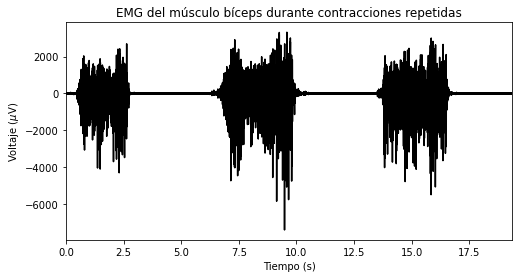

In [101]:
EMG(archivo='../Registros/S10_EMG_bicep_intermittent.wav')

El siguiente EMG se registró desde el bíceps cuando el sujeto mantuvo una contracción y aumentó gradualmente la cantidad de fuerza.

In [102]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                            #Tamaño de la gráfica.
    plt.title('EMG de bíceps con contracción mantenida') #Título.
    plt.xlabel(r'Tiempo (s)')                            #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                      #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


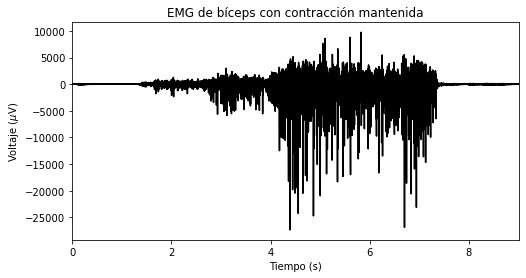

In [103]:
EMG(archivo='../Registros/S10_EMG_bicep_recruitment.wav')

### Preguntas de estudio:

##### ¿En qué se diferencian las grabaciones cuando observamos las contracciones musculares intermitentes frente a las sostenidas?

   En la primer señal vemos como el EMG se expresa como un impulso nervioso o eléctrico adquirido intermitentemente mientras el sujeto realiza una contracción voluntaria en 3 ocasiones considerando periodos de descanso, en esta primer señal vemos tres señales con amplitudes diferentes, en cada contracción voluntaria vemos como varía la amplitud y en la segunda contracción observamos como la amplitud aumenta mas a comparacion con las otras dos contracciones. 
   Por otro lado vemos un registro del bíceps cuando el sujeto mantiene la contracción y aumenta gradualmente la fuerza, a comparación del primer registro no podemos observar los periodos de descanso, podemos ver que la amplitud aumenta a medida que incrementa la fuerza.

##### ¿Qué características del registro EMG cambian a medida que el sujeto aumenta la fuerza de contracción y cómo?. En otras palabras, ¿cómo podríamos cuantificar el reclutamiento de unidades motoras?

   En la segunda señal observamos como la amplitud del EMG aumenta a medida que el sujeto ejerce mayor fuerza, en la gráfica se muestra que a partir de los 4s aumenta la amplitud, esta respuesta se debe al reclutamiento de unidades motoras. En los registros, el reclutamiento de unidades motoras se puede interpretar durante el incremento de fuerza, ya que la respuesta del músculo al estímulo depende del tiempo y de la fuerza, generando así que las inervaciones incrementen la fuerza , ya que el reclutamiento de unidades motoras depende de la fuerza.

##### ¿Qué otros ejercicios podría realizar mientras graba desde el músculo bíceps y cómo esperaría que se vean las grabaciones EMG?

   Se podría registrar la contracción de bíceps cuando el sujeto empieza con un esfuerzo y reduce gradualmente la fuerza hasta relajar completamente el músculo.

<a id='Músculotríceps'></a>
### Músculo tríceps

La siguiente grabación se realizó a partir del músculo tríceps mientras el sujeto realizaba fondos de tríceps.

In [104]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                               #Tamaño de la gráfica
    plt.title('EMG durante fondos con el músculo tríceps')  #Título.
    plt.xlabel(r'Tiempo (s)')                               #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                         #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                   #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


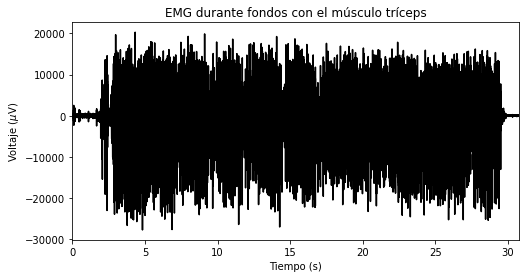

In [105]:
EMG(archivo='../Registros/S1_EMG_tricep_dips.wav')

La siguiente grabación es más compleja. Se hizo a partir del músculo tríceps e incluyó la siguiente secuencia de actividades: (1) durante los primeros 10 segundos, el sujeto estuvo en reposo, (2) después, durante los siguientes 10 segundos, el sujeto giró su brazo para activar el tríceps isométricamente , (3) a continuación el sujeto cambió de posición, y (4) finalmente, durante los últimos 20 segundos, el sujeto levantó y bajó repetidamente una botella con agua adentro (es decir, similar a una extensión de tríceps por encima de la cabeza).

In [106]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                                 #Tamaño de la gráfica.
    plt.title('EMG del músculo tríceps durante una secuencia de actividades') #Título.
    plt.xlabel(r'Tiempo (s)')                                                 #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                           #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                                     #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


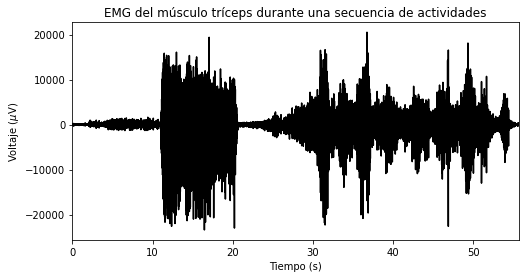

In [107]:
EMG(archivo='../Registros/S1_EMG_tricep_twistWeight.wav')

### Preguntas de estudio y ejercicios:

##### ¿Por qué crees que la grabación de tríceps muestra un alto nivel de actividad continua a pesar de que las inmersiones implican un movimiento hacia arriba y hacia abajo?

   En la grabación registramos la actividad cuando se realiza fuerza, la posición física que efectúa el sujeto siempre ejerce fuerza sin importar si se eleva o desciende durante el ejercicio, por lo tanto no hay momentos de reposo o disminución de fuerza(evidente).

##### ¿En qué se diferencia la actividad de inmersión de tríceps de la extensión repetida de tríceps al final de la segunda grabación y por qué?

   Comparando las dos señales mientras el sujeto se ejercita con fondos vs. al levantar una botella en repeticiones durante 20 s, vemos que las gráficas difieren entre sí, la primera señal se registra la actividad debido a la cantidad de fuerza que efectúa el músculo tríceps reclutando muchas unidades motoras  y así no ver cambios significativos en la señal, pero observamos que la amplitud del registro es bastante grande comparada con señales de otros músculos.
    En la segunda señal, cuando se registra el ejercicio con la botella observaremos el cambio de amplitud en el registro, cuando hay mayor amplitud es cuando el sujeto levanta la botella, y cuando disminuye deja de levantar la botella. Observamos que hay un registro bastante definido debido a que el ejercicio realizado fue repetitivo y rápido.

##### ¿Qué otros ejercicios podría realizar mientras graba desde el músculo tríceps, y cómo esperaría que fueran las grabaciones EMG?

   Efectuar registro en el tríceps cuando el sujeto se ejercita con dips con barras paralelas o utilizando un peso con una polea alta al frente y ejecutar extensiones.



<a id='Músculosdelantebrazo'></a>
## Músculos del antebrazo
La siguiente grabación se realizó desde el antebrazo mientras el sujeto presionaba repetidamente un dispositivo de ejercicio de agarre manual. Muestra cinco contracciones en total, la última sostenida por un período de tiempo más largo que las cuatro anteriores.

In [108]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                        #Tamaño de la gráfica.
    plt.title('EMG de los músculos del antebrazo con contracciones') #Título.
    plt.xlabel(r'Tiempo (s)')                                        #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                  #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                            #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


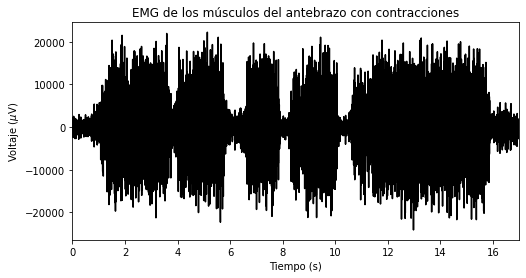

In [109]:
EMG(archivo='../Registros/S2_EMG_forearm_grip.wav')

La siguiente grabación se realizó desde el antebrazo mientras el sujeto participaba en una lucha de brazos. Alrededor del segundo 14, el sujeto perdió el partido.

In [110]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                                  #Tamaño de la gráfica.
    plt.title('EMG de los músculos del antebrazo durante una lucha de brazos') #Título.
    plt.xlabel(r'Tiempo (s)')                                                  #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                            #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                                      #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


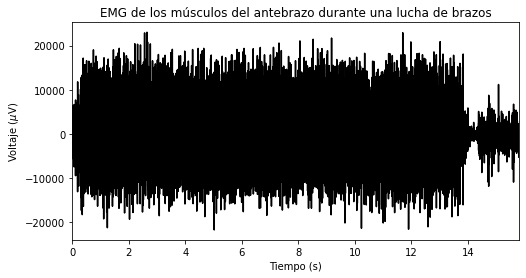

In [111]:
EMG(archivo='../Registros/S2_EMG_forearm_wrestle.wav')

#### Preguntas de estudio y ejercicios:

##### ¿Qué músculos se encuentran en el antebrazo y cuáles podrían contribuir a la señal EMG?

   Los músculos que se encuentran son el pronador redondo, palmar mayor, palmar menor, cubital anterior, flexor común superficial de los dedos, flexor común profundo de los dedos de la mano, flexor largo del pulgar, pronador cuadrado. Mientras que los músculos que contribuyen a la adquisición de la señal son cubital posterior, extensor común de los dedos, extensor propio del meñique.

##### ¿Qué otros músculos, además de los del antebrazo, podrían activarse durante una lucha de brazos? ¿Esperaría ver diferencias en sus EMG durante esta actividad?

   Se pueden activar los bíceps braquial, tríceps braquial, ancóneo y braquial debido a la naturaleza del ejercicio. Esperamos ver una diferencia en el registro , debido a la fuerza ejecutada en los músculos cuando se somete a una lucha de brazos, cuando empiece la actividad seguramente pasaremos de una amplitud iguala a 0, a una señal con amplitud bastante evidente.

##### ¿Qué otros ejercicios podría realizar mientras graba desde los músculos del antebrazo y cómo esperaría que se vean las grabaciones EMG?

   Ejercitar únicamente los dedos con una mancuerna pequeña y registrar los músculos del antebrazo , en lugar de los músculos de la mano. Efectuar una guerra de pulgares, pero registrar los músculos distales del antebrazo.


<a id='Músculosdelamandíbula'></a>
### Músculos de la mandíbula

Se registró la siguiente EMG de los músculos de la mandíbula. Durante los primeros 50 segundos, el sujeto masticó un caramelo gomoso suave. Luego hubo 10 segundos de descanso. Y finalmente, durante los últimos diez segundos, el sujeto hizo una sonrisa forzada.

In [112]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                           #Tamaño de la gráfica.
    plt.title('EMG de los músculos de la mandíbula con diversas actividades') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


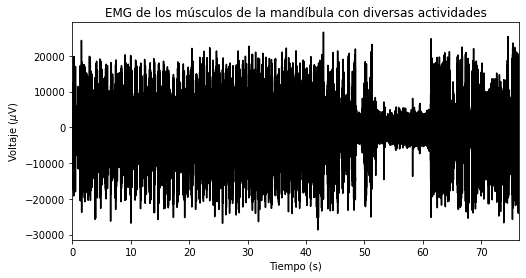

In [113]:
EMG(archivo='../Registros/S3_EMG_jawMuscle_chewSmile.wav')

### Preguntas de estudio y ejercicios:

#### ¿Qué músculos controlan la masticación y la sonrisa, y cuáles podrían contribuir a la señal EMG?

  Los músculos de la masticación son el temporal, masetero, pterigoideo lateral y pterigoideo medial, también están los músculos suprahioideos e infrahioideos y el músculo platisma que es un músculo de la expresión facial. Los músculos más grandes son los que pueden contribuir a una señal más limpia y no tan ruidosa , debido a que los músculos de la mandíbula están muy juntos entre sí, en esta adquisición se registró en el músculo masetero de capa profunda y masetero de capa superficial o el pterigoideo medial.

#### ¿Qué diferencias ves en los EMG registrados cuando el sujeto está masticando versus sonriendo, y qué crees que causa estas diferencias?

   Cuando el sujeto está masticando observamos una señal debido a la fuerza que realizan los músculos de la masticación, aunque la señal es muy similar a la observada cuando sonríe el sujeto, cuando sonríe el sujeto activa el músculo platisma que es un músculo de expresión facial, aunque es muy probable que los músculos suprahioideos e infrahioideos participen.
    
   Las señales muestran una amplitud muy similar entre sí, aunque sería ideal situar los electrodos a una zona diferente que registre la movilidad de otros músculos faciales, otra opción sería utilizar un registro más invasivo utilizando electrodos de aguja y así registrar con más definición la señal.

#### ¿Qué otras actividades podría realizar mientras graba desde la mandíbula u otros músculos faciales, y cómo esperaría que se vean las grabaciones EMG?

   Otro registro puede ser cuando el sujeto rota la cabeza, ya que de esta manera podemos registrar los músculos suprahioideos e infrahioideos.


<a id='Músculosabdominales'></a>
### Músculos abdominales

El siguiente registro EMG se realizó a partir de los músculos abdominales, específicamente el recto abdominal, durante las elevaciones de piernas en decúbito.

In [114]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                           #Tamaño de la gráfica.
    plt.title('EMG de los músculos abdominales con piernas sostenidas') #Título.
    plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                               #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 10000 Hz.
La grabación tiene un ancho de muestra de 2


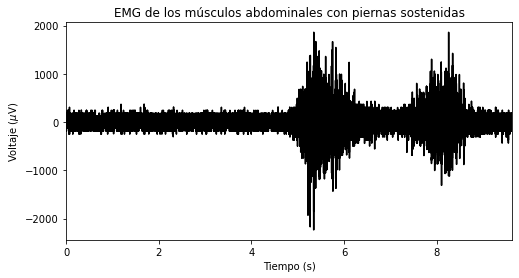

In [115]:
EMG(archivo='../registros/S5_EMG_abs_legLift3.wav')

Durante la siguiente grabación, el sujeto realizó una plancha sostenida.

In [116]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                              #Tamaño de la gráfica.
    plt.title('EMG de los músculos abdominales con una plancha sostenida') #Título.
    plt.xlabel(r'Tiempo (s)')                                              #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                        #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                                  #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 10000 Hz.
La grabación tiene un ancho de muestra de 2


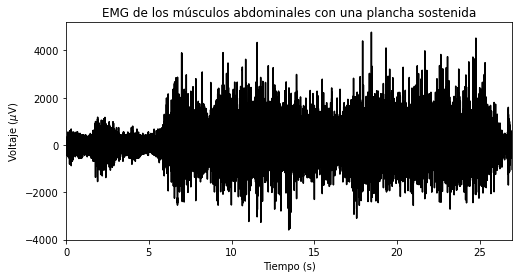

In [117]:
EMG(archivo='../Registros/S5_EMG_abs_plank.wav')

### Preguntas de estudio y ejercicios:

####  ¿Qué crees que sucedería con las grabaciones de EMG si el sujeto realizara más elevaciones de pierna acostado o intentará sostener la tabla por más tiempo? En otras palabras, ¿cómo puede aparecer la fatiga en las dos grabaciones?

  En el primer registro las elevaciones generan una señal bastante definida cuando los músculos de la pared anterolateral del abdomen se encuentran en reposo y cuando se encuentran en esfuerzo, en caso de tener un levantamiento de piernas y descenso sostenido, veremos que la señal puede variar respecto a su amplitud , ya que a mayor fuerza, sería mayor el reclutamiento de unidades motoras. La fatiga que se puede observar en el segundo caso es muy difícil ya que a medida que se realiza este ejercicio mayor será la fuerza ejercida por los músculos del abdomen, incluso los músculos del miembro superior e inferior se ven afectados.

#### ¿Cómo podríamos cuantificar la fatiga y cómo podría ser diferente la cuantificación para los dos tipos de ejercicio?

  Se puede cuantificar dependiendo de las unidades motoras reclutadas, depende de la cantidad de grasa abdominal o músculos trabajados, obtendremos diferentes señales. La fatiga es observable de la siguiente manera, en primer lugar cuando se realizan levantamientos la fatiga se puede hacer evidente después de la fuerza al ejercitarse, aunque es muy difícil ver la fatiga cuando se realizan planchas, ya que en lugar de disminuirse la fuerza, aumenta la cantidad de fuerza con el paso del tiempo.

#### ¿Qué otros ejercicios podría hacer para activar los músculos abdominales, o de qué otros músculos abdominales podría grabar y cómo esperaría que se vean las grabaciones de EMG?

  Otro ejercicio recomendable es hacer abdominales invertidas o bicicleta en el piso para ejercitar el abdomen, de esta manera registrar el músculo oblicuo externo del abdomen o el músculo recto del abdomen.


<a id='Músculoscuádriceps'></a>
### Músculos cuádriceps

El siguiente EMG se registró de los músculos del cuádricep mientras el sujeto realizaba una sentadilla con una pierna, también conocida como sentadilla búlgara. El sujeto también tenía una mochila llena de libros durante el ejercicio para aumentar el peso.

In [118]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                             #Tamaño de la gráfica.
    plt.title('EMG de los músculos del cuádricep durante una sentadilla') #Título.
    plt.xlabel(r'Tiempo (s)')                                             #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                       #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                                 #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 10000 Hz.
La grabación tiene un ancho de muestra de 2


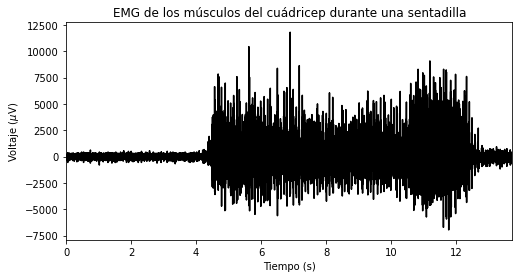

In [119]:
EMG(archivo='../Registros/S9_EMG_quadricep_oneLegSquat1.wav')

En la siguiente grabación, el sujeto sostuvo una sentadilla en la pared, manteniendo la mochila sobre las piernas para agregar peso.

In [120]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()   #número de canales y retorna el número de canales de audio. 
    N= record.getnframes()               #número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Graficamos EMG.
    plt.figure(figsize=(8,4))                                                         #Tamaño de la gráfica.
    plt.title('EMG de los músculos del cuádricep durante una sentadilla en la pared') #Título.
    plt.xlabel(r'Tiempo (s)')                                                         #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                                   #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                                             #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 10000 Hz.
La grabación tiene un ancho de muestra de 2


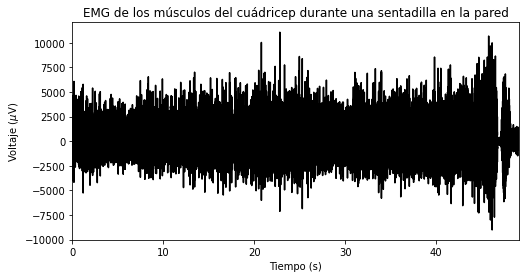

In [121]:
EMG(archivo='../Registros/S9_EMG_quadricep_squatSustained.wav')

### Preguntas de estudio y ejercicios:

#### ¿Qué músculos componen el grupo de cuádriceps y cuáles podrían contribuir a la señal EMG?

   Los músculos que componen el cuádriceps son los músculos anteriores del muslo: que son extensores de la rodilla como: cuádriceps femoral, recto femoral, vasto lateral, vasto medial y vasto intermedio. Los que probablemente contribuyen a la señal son el recto femoral, vasto medial, lateral o intermedio.

#### ¿Qué factores podrían explicar las fluctuaciones observadas en las dos grabaciones? ¿Qué pudo haber causado el aumento de amplitud al final de la grabación de sentadillas en la pared?

   Las fluctuaciones se deben posiblemente a la inestabilidad del ejercicio, en la primera señal tenemos un registro activado cuando el sujeto empieza la sentadilla con peso, mientras realiza la sentadilla vemos más fluctuaciones cambiando la estabilidad de la amplitud, por otro lado tenemos la segunda señal que no presenta demasiadas fluctuaciones, pero si muestra un aumento en la amplitud del registro, esto se debe a que el sujeto ejerce más fuerza al recargarse contra la pared, este ejercicio tiene fuerza adicional comparado con el primero, pero tiene mayor estabilidad al estar recargado a algo fijo. 


#### ¿Qué otros ejercicios podría realizar mientras graba desde los músculos cuádriceps, y cómo esperaría que se vean las grabaciones EMG?

   Se podrían realizar sentadillas con una sola pierna y registrar esa señal, también se puede registrar el esfuerzo que tienen los cuadriceps cuando el sujeto realiza fondos elevados.


### Referencias

Registros y Notebook recuperado del repositorio elaborado por la Dra.Erin C. McKiernan, Noel Isaías Plascencia Díaz, Mitsui Myrna Salgado Saito, Ana Daniela del Río Pulido, consultado en:
https://github.com/emckiernan/electrophys

Este trabajo fue apoyado por UNAM-DGAPA-PAPIME PE213817 y PE213219.